## 分析
### 1. 何ヶ月で死んだか
横軸が継続期間、縦軸がブログ数

19445
0.29411159681151966
0.6930830547698638
0.8790948830033427


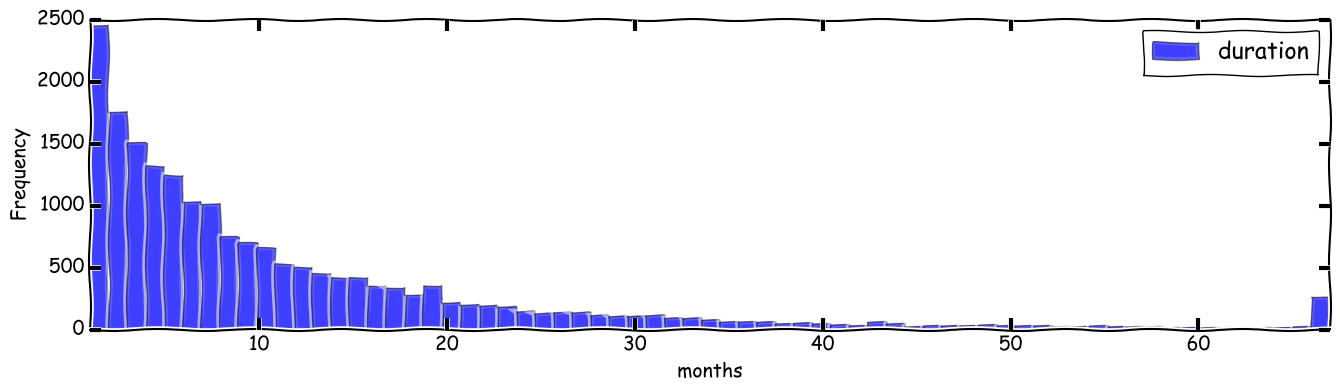

In [48]:
%matplotlib inline
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
plt.xkcd()
df = pd.read_csv("blog_info.csv")
df = df.dropna()
# df = df[df["state"]=="Inactive"]
print(len(df))
print(len(df[df["duration"]<=3])/len(df))
print(len(df[df["duration"]<=12])/len(df))
print(len(df[df["duration"]<=24])/len(df))
ax= df.plot( y=['duration'], bins=67, alpha=0.5, figsize=(16,4), kind='hist')
plt.xlim(1,67)
plt.xlabel("months")

### 2. 生存率
縦軸が死亡率。
nヶ月以内に死ぬ確率

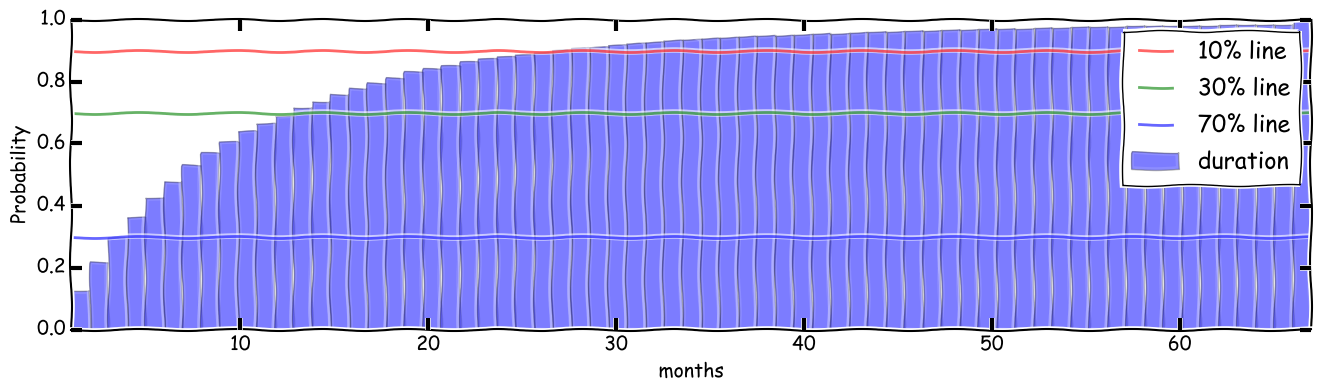

In [30]:
# plt.figure(figsize=(12,6))
ax= df.plot( y=['duration'], bins=67, alpha=0.3, figsize=(16,4), kind='hist', normed=True, cumulative=True)
plt.plot([1,67],[0.9,0.9],"r",alpha=0.6,label="10% line")
plt.plot([1,67],[0.7,0.7],"g",alpha=0.6,label="30% line")
plt.plot([1,67],[0.3,0.3],"b",alpha=0.6,label="70% line")
plt.legend()
plt.xlim(1,67)
plt.ylim(0,1)
plt.xlabel("months")
plt.ylabel("Probability")

### 3. 開始時期は月によって違うのか

13785.0


(0, 1500)

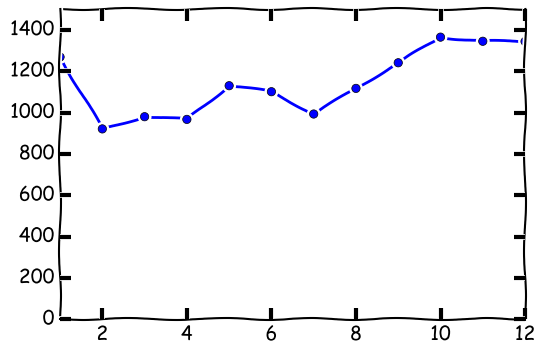

In [32]:
years = range(2013,2017)
months = range(1,13)
counts_m = np.zeros(12)

for year in years:
    for month in months:
        begin = "{}-{}".format(year,month)
        if month < 12:
            end = "{}-{}".format(year, month+1)
        if month == 12:
            end = "{}-{}".format(year+1, 1)            
        begin_dt = datetime.datetime.strptime(begin, '%Y-%m')
        end_dt   = datetime.datetime.strptime(end, '%Y-%m')
        for start in df["start"]:
            start_month = datetime.datetime.strptime(start, '%Y-%m')
            flag1 = start_month >= begin_dt
            flag2 = start_month < end_dt
            if flag1 and flag2:
                counts_m[month-1] += 1
print(counts_m.sum())
plt.plot(months, counts_m,"-o")
plt.xlim(1,12)
plt.ylim(0,1500)

### 4. 読者数のヒストグラム
- 100人以上 : 15%
- 200人以上 : 5.6%
- 300人以上 : 3%
- 1000人以上 : 0.4%

17608
0.1493071331213085
0.056962744207178555
0.030497501135847344
0.004486597001363017


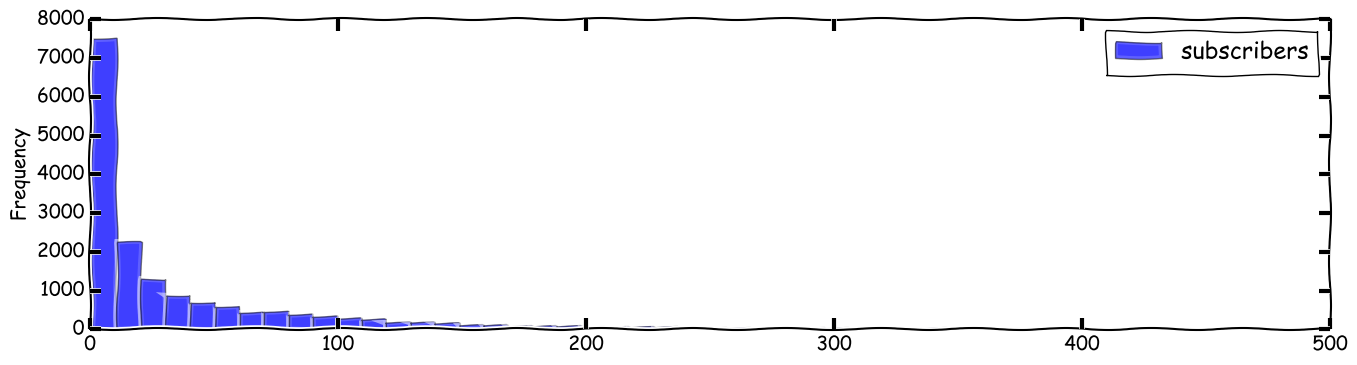

In [56]:
dfa = pd.read_csv("blog_info.csv")
print(len(dfa))
print(len(dfa[dfa["subscribers"]>=100])/len(dfa))
print(len(dfa[dfa["subscribers"]>=200])/len(dfa))
print(len(dfa[dfa["subscribers"]>=300])/len(dfa))
print(len(dfa[dfa["subscribers"]>=1000])/len(dfa))
ax = dfa[dfa["subscribers"]<=500].plot( y=['subscribers'], bins=50, alpha=0.5, figsize=(16,4), kind='hist')
plt.savefig("3.png")

### 5. 継続期間と読者の相関
- 読者数 = 3.5×月+25

[[ 3.56617486]]
[ 23.98317462]
0.840378609847


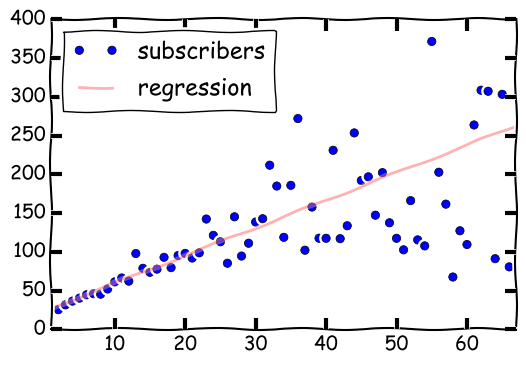

In [57]:
# sklearn.linear_model.LinearRegression クラスを読み込み
from sklearn import linear_model
clf = linear_model.LinearRegression()
subs = np.zeros(66)
dfa = dfa[dfa["state"] == "Active"]
for d in range(66):
    sub = dfa[dfa["duration"]==d+1]["subscribers"]
    if len(sub)==0:
        continue
    subs[d] = sub.sum()/len(sub)
plt.plot(range(1,67), subs,"o", label="subscribers")
plt.xlim(1,67)

n = 30
X = np.array(range(1,67))[:n].reshape(n,1)
Y = subs[:n].reshape(n,1)
# 予測モデルを作成
clf.fit(X, Y)
# 回帰係数
print(clf.coef_)
# 切片 (誤差)
print(clf.intercept_)
# 決定係数
print(clf.score(X, Y))
x = np.linspace(1,100,100)
plt.plot(x,clf.intercept_[0]+clf.coef_[0][0]*x,label="regression",alpha=0.3)
plt.legend(loc=2)